In [410]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import time

# to ignore the warnings
from warnings import filterwarnings

In [411]:
scores_df = pd.read_excel('./data/game_scores.xlsx')
scores_df.head()

,date,visitor,home,visitor_points,home_points
0,2015-11-25T01:00:00.000Z,Boston Celtics,Atlanta Hawks,97.0,121.0
1,2016-04-09T23:30:00.000Z,Boston Celtics,Atlanta Hawks,107.0,118.0
2,2016-04-16T23:00:00.000Z,Boston Celtics,Atlanta Hawks,101.0,102.0
3,2016-04-19T23:00:00.000Z,Boston Celtics,Atlanta Hawks,72.0,89.0
4,2016-04-27T00:30:00.000Z,Boston Celtics,Atlanta Hawks,83.0,110.0


In [412]:
scores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14242 entries, 0 to 14241
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            14242 non-null  object 
 1   visitor         14242 non-null  object 
 2   home            14242 non-null  object 
 3   visitor_points  12690 non-null  float64
 4   home_points     12690 non-null  float64
dtypes: float64(2), object(3)
memory usage: 556.5+ KB


In [413]:
# Find columns and total null values
scores_df.isnull().sum()

date                 0
visitor              0
home                 0
visitor_points    1552
home_points       1552
dtype: int64

In [414]:
# Convert date object to datetime data type
scores_df['date'] = pd.to_datetime(scores_df['date'], errors='coerce')
scores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14242 entries, 0 to 14241
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   date            13926 non-null  datetime64[ns, UTC]
 1   visitor         14242 non-null  object             
 2   home            14242 non-null  object             
 3   visitor_points  12690 non-null  float64            
 4   home_points     12690 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(2), object(2)
memory usage: 556.5+ KB


In [415]:
# Find rows that contain null values
scores_df[scores_df['visitor_points'].isnull()]

,date,visitor,home,visitor_points,home_points
23,2024-11-05 00:45:00+00:00,Boston Celtics,Atlanta Hawks,NaN,NaN
46,2024-11-13 00:00:00+00:00,Atlanta Hawks,Boston Celtics,NaN,NaN
47,2025-01-19 00:00:00+00:00,Atlanta Hawks,Boston Celtics,NaN,NaN
65,2024-10-23 23:30:00+00:00,Brooklyn Nets,Atlanta Hawks,NaN,NaN
82,2025-03-16 22:00:00+00:00,Atlanta Hawks,Brooklyn Nets,NaN,NaN
...,...,...,...,...,...
14210,NaT,Toronto Raptors,Washington Wizards,NaN,NaN
14220,2025-01-30 00:00:00+00:00,Toronto Raptors,Washington Wizards,NaN,NaN
14221,2025-03-24 23:00:00+00:00,Toronto Raptors,Washington Wizards,NaN,NaN
14231,2025-03-06 00:00:00+00:00,Utah Jazz,Washington Wizards,NaN,NaN


In [416]:
# Getting today's date
todays_Date = dt.date.fromtimestamp(time.time())
 
# Calling the isoformat() function over the
# today's date
date_in_ISOFormat = todays_Date.isoformat()

# Create a dataframe with no dates past current day
df = scores_df.loc[scores_df['date'] <= date_in_ISOFormat]

# Reset index
df.reset_index(inplace=True, drop=True)

# Display
df

,date,visitor,home,visitor_points,home_points
0,2015-11-25 01:00:00+00:00,Boston Celtics,Atlanta Hawks,97.0,121.0
1,2016-04-09 23:30:00+00:00,Boston Celtics,Atlanta Hawks,107.0,118.0
2,2016-04-16 23:00:00+00:00,Boston Celtics,Atlanta Hawks,101.0,102.0
3,2016-04-19 23:00:00+00:00,Boston Celtics,Atlanta Hawks,72.0,89.0
4,2016-04-27 00:30:00+00:00,Boston Celtics,Atlanta Hawks,83.0,110.0
...,...,...,...,...,...
12722,2020-02-29 02:00:00+00:00,Washington Wizards,Utah Jazz,119.0,129.0
12723,2021-04-13 01:00:00+00:00,Washington Wizards,Utah Jazz,125.0,121.0
12724,2021-12-19 02:00:00+00:00,Washington Wizards,Utah Jazz,109.0,103.0
12725,2022-12-23 02:00:00+00:00,Washington Wizards,Utah Jazz,112.0,120.0


# Analysis

In [418]:
teams = scores_df['visitor'].unique()
teams

array(['Boston Celtics', 'Atlanta Hawks', 'Brooklyn Nets',
       'Charlotte Hornets', 'Chicago Bulls', 'Cleveland Cavaliers',
       'Dallas Mavericks', 'Denver Nuggets', 'Detroit Pistons',
       'Golden State Warriors', 'Houston Rockets', 'Indiana Pacers',
       'LA Clippers', 'Los Angeles Lakers', 'Memphis Grizzlies',
       'Miami Heat', 'Milwaukee Bucks', 'Minnesota Timberwolves',
       'New Orleans Pelicans', 'New York Knicks', 'Oklahoma City Thunder',
       'Orlando Magic', 'Philadelphia 76ers', 'Phoenix Suns',
       'Portland Trail Blazers', 'Sacramento Kings', 'San Antonio Spurs',
       'Toronto Raptors', 'Utah Jazz', 'Washington Wizards'], dtype=object)

In [451]:
visitor = 'Memphis Grizzlies'
home = 'Utah Jazz'

matchup_game = df.loc[(df['visitor'] == visitor) & (df['home'] == home)]
matchup_game

,date,visitor,home,visitor_points,home_points
9677,2015-11-08 02:00:00+00:00,Memphis Grizzlies,Utah Jazz,79.0,89.0
9678,2016-01-03 02:00:00+00:00,Memphis Grizzlies,Utah Jazz,87.0,92.0
9679,2016-11-15 02:00:00+00:00,Memphis Grizzlies,Utah Jazz,102.0,96.0
9680,2017-01-29 02:00:00+00:00,Memphis Grizzlies,Utah Jazz,102.0,95.0
9681,2018-03-31 01:00:00+00:00,Memphis Grizzlies,Utah Jazz,97.0,107.0
9682,2018-10-23 01:00:00+00:00,Memphis Grizzlies,Utah Jazz,92.0,84.0
9683,2018-11-03 01:00:00+00:00,Memphis Grizzlies,Utah Jazz,110.0,100.0
9684,2018-07-15 02:30:00+00:00,Memphis Grizzlies,Utah Jazz,92.0,86.0
9685,2018-07-04 01:00:00+00:00,Memphis Grizzlies,Utah Jazz,95.0,92.0
9686,2019-07-02 01:00:00+00:00,Memphis Grizzlies,Utah Jazz,85.0,68.0


In [453]:
matchup_game['total_points'] = matchup_game['visitor_points'] + matchup_game['home_points']

C:\Users\User\AppData\Local\Temp\ipykernel_13336\3752321018.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matchup_game['total_points'] = matchup_game['visitor_points'] + matchup_game['home_points']


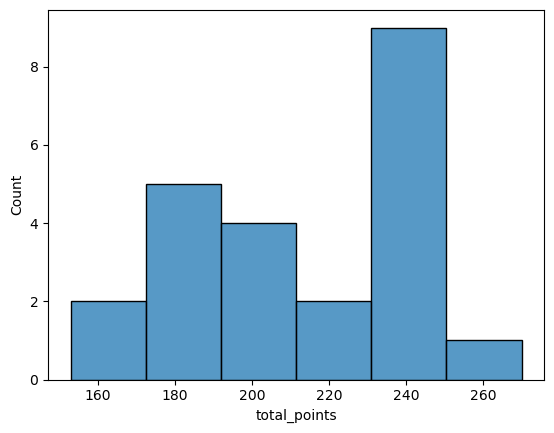

In [455]:
sns.histplot(data=matchup_game, x='total_points', stat='count')
plt.show()


In [456]:
matchup_game['winner'] = matchup_game.apply(lambda row: home if row['home_points'] > row['visitor_points']  else visitor, axis=1)
matchup_game

C:\Users\User\AppData\Local\Temp\ipykernel_13336\1287123281.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matchup_game['winner'] = matchup_game.apply(lambda row: home if row['home_points'] > row['visitor_points']  else visitor, axis=1)


,date,visitor,home,visitor_points,home_points,total_points,winner
9677,2015-11-08 02:00:00+00:00,Memphis Grizzlies,Utah Jazz,79.0,89.0,168.0,Utah Jazz
9678,2016-01-03 02:00:00+00:00,Memphis Grizzlies,Utah Jazz,87.0,92.0,179.0,Utah Jazz
9679,2016-11-15 02:00:00+00:00,Memphis Grizzlies,Utah Jazz,102.0,96.0,198.0,Memphis Grizzlies
9680,2017-01-29 02:00:00+00:00,Memphis Grizzlies,Utah Jazz,102.0,95.0,197.0,Memphis Grizzlies
9681,2018-03-31 01:00:00+00:00,Memphis Grizzlies,Utah Jazz,97.0,107.0,204.0,Utah Jazz
9682,2018-10-23 01:00:00+00:00,Memphis Grizzlies,Utah Jazz,92.0,84.0,176.0,Memphis Grizzlies
9683,2018-11-03 01:00:00+00:00,Memphis Grizzlies,Utah Jazz,110.0,100.0,210.0,Memphis Grizzlies
9684,2018-07-15 02:30:00+00:00,Memphis Grizzlies,Utah Jazz,92.0,86.0,178.0,Memphis Grizzlies
9685,2018-07-04 01:00:00+00:00,Memphis Grizzlies,Utah Jazz,95.0,92.0,187.0,Memphis Grizzlies
9686,2019-07-02 01:00:00+00:00,Memphis Grizzlies,Utah Jazz,85.0,68.0,153.0,Memphis Grizzlies


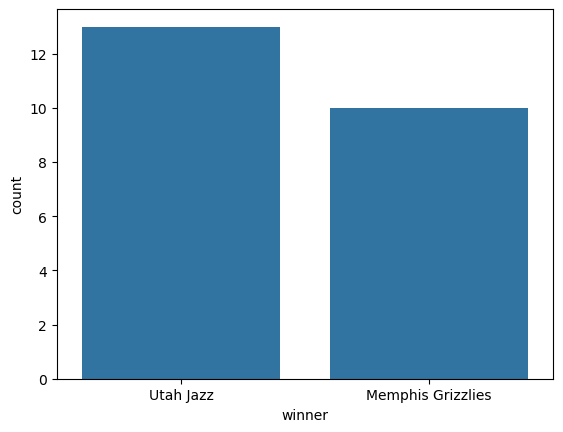

In [459]:
sns.countplot(matchup_game, x='winner')
plt.show()